# Descenso por gradiente completo

(Ejercicio, 3 puntos posibles)

El método de descenso por gradiente es una técnica de optimización utilizada para encontrar el mínimo de una función. Consiste en iterativamente ajustar los parámetros de la función en la dirección opuesta al gradiente de la función de pérdida, multiplicado por una tasa de aprendizaje. Esto permite que los parámetros converjan hacia los valores que minimizan la función de pérdida, lo que es crucial en el entrenamiento de modelos de aprendizaje automático como redes neuronales, donde se busca minimizar el error entre las predicciones del modelo y los valores reales.

En este notebook implementaremos el algoritmo completo de descenso por gradiente. Para validar que funciona al final lo probaremos en el entrenamiento de una red neuronal simple. Usaremos como conjunto de datos que esta incluído en el archivo data.csv. 

@juan1rving

Nota: Este notebook requiere que copies los archivos requeridos antes de usar en Colab.


In [145]:
# importamos los paquete necesarios
import numpy as np
import nni

# cargamos datos de ejemplo
from data_prep import features, targets, features_test, targets_test

n_records, n_features = features.shape
last_loss = None

# En este ejercicio por propósitos de analizar las salidas utilizaremos la misma semilla para los números aleatorios.
np.random.seed(42)

## Inicialización de los pesos

En un principio no queremos tener todos los pesos en cero porque esto generaría en la salida una predicción nula. Por lo tanto, asignaremos los pesos iniciales de forma aleatoria y cercanos a cero. Otra recomendación es escalar los valores aleatorios es dependencia del número de entradas del nodo (n).

$$w = rand(1,\frac{1}{\sqrt{n}})$$



In [146]:
# Initialize weights. 
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
bias = np.zeros(1)

# Definimos la neurona
from nni.models import Neurona
from nni.functions import sigmoid

nodo = Neurona(weights, bias, nni.functions.sigmoid)


$$ Exactitud = \frac{\# aciertos}{\# predicciones} $$

In [147]:
# Probemos la exactitud de la red antes de entrenarla
test_out = nodo.forward(features_test)
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Exactitud: {:.3f}".format(accuracy))


Exactitud: 0.475


## Hiperparámetros

Los hiperpámetros de la red indican el números de veces que itera el método (épocas-epochs), la taza de aprendizaje (learning rate).


In [148]:
# número de épocas
epochs = 800

# tasa de aprendizaje
learnrate = 0.08

## Descenso por gradiente completo.

El algoritmo de descenso por gradiente de forma iterativa cambia el valor de los pesos de tal forma que se disminuya el error. 

<img src="files/despg.png" width="70%" align="center">

En la siguiete celda encontrarás la plantilla del algoritmo. Tu misión, si decides aceptarla, es completar el código faltante para que funcione el entrenamiento.

In [149]:
#TODO (1 punto): Completa el código faltante

# Variable para registrar el rendimiento
History_loss = []

# Algoritmo descenso por gradiente
for e in range(epochs):
    incremento_w = np.zeros(weights.shape)
    # Para todos los renglones de ejemplo, asignar a x la entrada, y a y la salida deseada
    for x, y in zip(features.values, targets):
        # TODO: calcula la predicción de la red
        output = nodo.forward(x)

        # TODO: calcula el término de error
        error = y - output
        derivada_sigmoid = output * (1 - output)
        error_term = error * derivada_sigmoid

        # TODO: calcula el incremento
        incremento_w += error_term * x

    # TODO: Actualiza los pesos
    weights += learnrate/n_records * incremento_w
    nodo.weights = weights

    # Ahora calculemos el error en el conjunto de datos de entrenamiento para registro y visualización
    out = nodo.forward(features.values)
    loss = np.mean((out - targets) ** 2)    
    History_loss.append(loss)
    if e % (epochs / 10) == 0:
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

Train loss:  0.26395720031851927
Train loss:  0.2486352941903916
Train loss:  0.2376675561120999
Train loss:  0.22946492635629745
Train loss:  0.2231767305808904
Train loss:  0.21829545649463095
Train loss:  0.2144771299549526
Train loss:  0.21147013594577843
Train loss:  0.20908500190499288
Train loss:  0.20717818155666828


TODO: Prueba distintas cantidades de épocas y visualiza el resultado. Puedes usar los valores almacenados en el historial de la perdida. Si es que tu método esta entrenando bien el resultado deberá graficarse como la siguiente figura.
<div text-align=center>
<img src="files/train.png" width="50%">
</div>

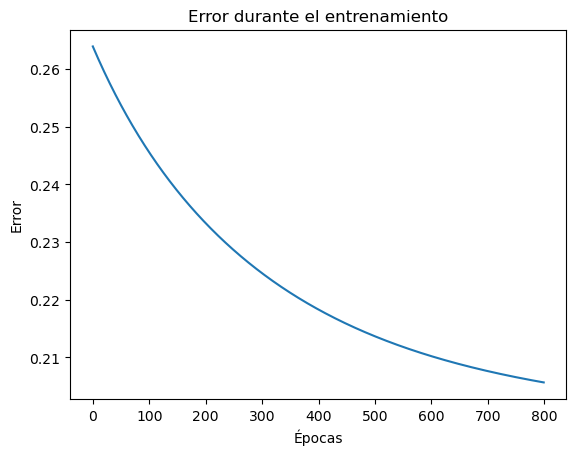

In [150]:
# Grafica el error conforme avanzaron las épocas del entrenamiento.

import matplotlib.pyplot as plt

plt.plot(History_loss)
plt.title("Error durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.show()


## Evaluemos la exactitud de la red

Validar una red neuronal es crucial porque permite evaluar su rendimiento en datos independientes, verificando su capacidad para generalizar patrones aprendidos durante el entrenamiento. Mientras que el entrenamiento adapta los pesos de la red para minimizar el error en los datos de entrenamiento, la validación revela si el modelo puede hacer predicciones precisas en datos nuevos. Este proceso ayuda a detectar problemas de sobreajuste o subajuste, garantizando así que la red pueda desempeñarse de manera efectiva en situaciones del mundo real y proporcionar resultados confiables y útiles.


In [151]:
# Cálculo de la exactitud

test_out = nodo.forward(features_test)
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775


Que tan bien te fue en los resultados? Seguramente bien. Si logras un accuracy de más del 0.74 entonces alcanzas 2 puntos.